In [1]:
# ref = https://tykimos.github.io/2017/03/08/CNN_Getting_Started/

In [2]:
# 1 문제 정의하고, 패키지 준비하고, 랜덤 시드 지정하기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤 시드 지정하기
np.random.seed(3)

Using TensorFlow backend.


In [3]:
# 2 데이터 준비하기
# wget http://tykimos.github.io/warehouse/2017-3-8_CNN_Getting_Started_handwriting_shape.zip
# unzip 2017-3-8_CNN_Getting_Started_handwriting_shape.zip

# 3 데이터셋 생성하기
# ImageDataGenerator 클래스의 flow_from_directory 함수를 이용해서 데이터셋을 만든다.

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'warehouse/handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'warehouse/handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [4]:
# 4 모델 구성하기
# Conv Layer : 입력 이미지 크기 24 x 24, 입력 이미지 채널 3개, 필터 크기 3 x 3, 필터 수 32개, 활성화 함수 ‘relu’
# Conv Layer : 필터 크기 3 x 3, 필터 수 64개, 활성화 함수 ‘relu’
# MaxPooling Layer : 풀 크기 2 x 2
# Flatten
# Dense Layer : 출력 뉴런 수 128개, 활성화 함수 ‘relu’
# Dense Layer : 출력 뉴런 수 3개, 활성화 함수 ‘softmax’

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 3))) # padding default = valid
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

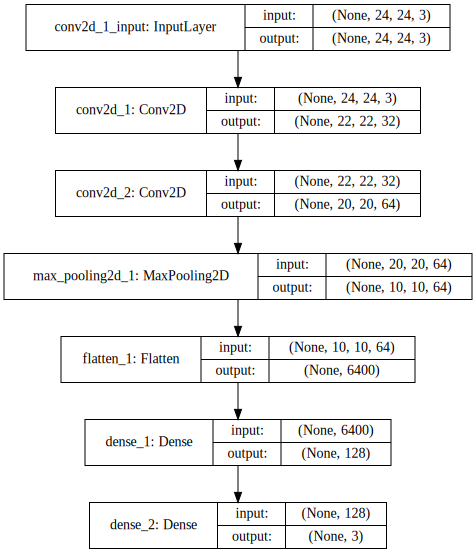

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
# 5 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# 6 모델 학습시키기
# generator = 훈련데이터를 제공한다
# steps_per_epoch = 한 epoch에서 사용할 step count 이다. 45개의 훈련 데이터가 있고, batch_size = 3 이므로 45/3 = 15 로 정한다.
# validation_data = 검증데이터를 제공한다.
# validation_steps = 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정한다. 15개의 검증 데이터가 있고 batch_size = 3 이므로 15/3 = 5 으로 정한다.
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=15,
    epochs=50,
    validation_data=test_generator,
    validation_steps=5)

Epoch 1/50
15/15 [==============================] - 1s 55ms/step - loss: 0.9712 - acc: 0.5778 - val_loss: 0.5546 - val_acc: 0.6667
Epoch 2/50
15/15 [==============================] - 1s 37ms/step - loss: 0.2224 - acc: 0.9556 - val_loss: 0.0568 - val_acc: 1.0000
Epoch 3/50
15/15 [==============================] - 1s 54ms/step - loss: 0.0103 - acc: 1.0000 - val_loss: 0.0383 - val_acc: 1.0000
Epoch 4/50
15/15 [==============================] - 1s 51ms/step - loss: 7.3034e-04 - acc: 1.0000 - val_loss: 0.0162 - val_acc: 1.0000
Epoch 5/50
15/15 [==============================] - 1s 51ms/step - loss: 4.2336e-04 - acc: 1.0000 - val_loss: 0.0174 - val_acc: 1.0000
Epoch 6/50
15/15 [==============================] - 1s 41ms/step - loss: 2.1749e-04 - acc: 1.0000 - val_loss: 0.0140 - val_acc: 1.0000
Epoch 7/50
15/15 [==============================] - 1s 35ms/step - loss: 1.8113e-04 - acc: 1.0000 - val_loss: 0.0125 - val_acc: 1.0000
Epoch 8/50
15/15 [==============================] - 1s 34ms/step - 

In [8]:
# 7 모델 평가하기

print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 100.00%


In [9]:
# 8 모델 사용하기

print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'triangle': 2, 'rectangle': 1}
[[1.000 0.000 0.000]
 [0.997 0.000 0.003]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.010 0.889 0.101]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 0.003 0.997]
 [0.000 1.000 0.000]]
